In [1]:
from time import time as get_time
from utilities import fun_name, generate_array

from matplotlib import pyplot as plt

from sorts.bubble_sort import bubble_sort
from sorts.shaker_sort import shaker_sort
from sorts.comb_sort import comb_sort
from sorts.insertion_sort import insertion_sort
from sorts.selection_sort import selection_sort
from sorts.merge_sort import merge_sort
from sorts.quick_sort import quick_sort
from sorts.heap_sort import heap_sort

In [2]:
def get_top(results):
    return sorted(list(results.items()), key=lambda r: r[1][-1][-1])

plot_dir = 'plots/'
def plot_top(top, unique_perc, plot_name):
    fig = plt.figure(figsize=(16, 8))
    plt.title('Sorting algorithms speed comparison\n'
              + 'unique_perc = %s' % unique_perc, fontsize=20)
    
    colors = ['r', '#FF4500', 'm', 'b', '#1E90FF', 'g', '#9ACD32', '#999999']
    for i, (sort_fun, rs) in enumerate(top):
        sizes, _, times = zip(*rs)
        plt.plot(sizes, times,
                 linestyle = '-',
                 marker = 'o',
                 color=colors[i % len(colors)],
                 label=sort_fun)

    plt.xlabel('array_size', fontsize=20)
    plt.ylabel('time', fontsize=20)
    plt.grid(True)
    plt.legend(loc=0, fontsize=20)
    
    plt.savefig(plot_dir + plot_name + '.png')

In [3]:
# TODO: calc avg speed over multiple arrays
# TODO: add partially sorted feature
def test_speed(sort_funs, array_sizes, unique_perc):
    print('SPEED TEST')
    print('SORT FUNS: %s' % list(map(fun_name, sort_funs)))
    print('UNIQUE PERCENTAGE: %s' % unique_perc)
     
    results = { fun_name(sort_fun) : [] for sort_fun in sort_funs }
    
    for array_size in array_sizes:
        print('\nARRAY SIZE: %s' % array_size)
        
        unique_count = int(array_size * unique_perc)
        lb = -(unique_count // 2) + (unique_count % 2 == 0)
        rb = unique_count // 2
        print('UNIQUE COUNT: %s' % unique_count)
        
        b = generate_array(array_size, lb, rb)
        for sort_fun in sort_funs:
            print('SORT: %s' % fun_name(sort_fun))
            
            a = b[:]

            start = get_time()
            sort_fun(a)
            end = get_time()

            results[fun_name(sort_fun)].append((array_size, unique_count, end - start))

            print('TIME: %s' % results[fun_name(sort_fun)][-1][-1])
        
        top = sorted([(sort_fun, results[sort_fun][-1][-1]) for sort_fun in results], key=lambda r: r[1])
        print('\nTOP:')
        for r in top:
            print('%s: %s' % r)
    
    print('\nSPEED TEST DONE!')
    return results

In [4]:
sort_funs = [
    quick_sort,
    heap_sort,
    comb_sort,
    
    merge_sort,
    
    selection_sort,
    insertion_sort,
    shaker_sort,
    bubble_sort,
]

array_sizes = [
    int(1e3),
    int(5e3),
    int(1e4),
    int(5e4),
    
    int(1e5),   
    int(3e5),
    int(5e5),
    
    int(8e5),
    int(1e6),
]

unique_perc_1 = 1

In [5]:
results_1 = test_speed(sort_funs[:3], array_sizes[:], unique_perc_1)

SPEED TEST
SORT FUNS: ['quick_sort', 'heap_sort', 'comb_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: quick_sort
TIME: 0.0035300254821777344
SORT: heap_sort
TIME: 0.005614280700683594
SORT: comb_sort
TIME: 0.004585742950439453

TOP:
quick_sort: 0.0035300254821777344
comb_sort: 0.004585742950439453
heap_sort: 0.005614280700683594

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: quick_sort
TIME: 0.017505168914794922
SORT: heap_sort
TIME: 0.033345937728881836
SORT: comb_sort
TIME: 0.02781987190246582

TOP:
quick_sort: 0.017505168914794922
comb_sort: 0.02781987190246582
heap_sort: 0.033345937728881836

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: quick_sort
TIME: 0.0346529483795166
SORT: heap_sort
TIME: 0.07625961303710938
SORT: comb_sort
TIME: 0.07685399055480957

TOP:
quick_sort: 0.0346529483795166
heap_sort: 0.07625961303710938
comb_sort: 0.07685399055480957

ARRAY SIZE: 50000
UNIQUE COUNT: 50000
SORT: quick_sort
TIME: 0.232041597366333
SORT: heap_sort
TIME: 0.53711318

In [6]:
results_2 = test_speed([sort_funs[3]], array_sizes[:], unique_perc_1)

SPEED TEST
SORT FUNS: ['merge_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: merge_sort
TIME: 0.006908893585205078

TOP:
merge_sort: 0.006908893585205078

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: merge_sort
TIME: 0.060632944107055664

TOP:
merge_sort: 0.060632944107055664

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: merge_sort
TIME: 0.10596370697021484

TOP:
merge_sort: 0.10596370697021484

ARRAY SIZE: 50000
UNIQUE COUNT: 50000
SORT: merge_sort
TIME: 1.0726187229156494

TOP:
merge_sort: 1.0726187229156494

ARRAY SIZE: 100000
UNIQUE COUNT: 100000
SORT: merge_sort
TIME: 3.7222073078155518

TOP:
merge_sort: 3.7222073078155518

ARRAY SIZE: 300000
UNIQUE COUNT: 300000
SORT: merge_sort
TIME: 31.33504295349121

TOP:
merge_sort: 31.33504295349121

ARRAY SIZE: 500000
UNIQUE COUNT: 500000
SORT: merge_sort
TIME: 91.2658178806305

TOP:
merge_sort: 91.2658178806305

ARRAY SIZE: 800000
UNIQUE COUNT: 800000
SORT: merge_sort
TIME: 272.52378487586975

TOP:
merge_sort: 272.52378

In [7]:
results_3 = test_speed(sort_funs[4:], array_sizes[:4], unique_perc_1)

SPEED TEST
SORT FUNS: ['selection_sort', 'insertion_sort', 'shaker_sort', 'bubble_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: selection_sort
TIME: 0.08412909507751465
SORT: insertion_sort
TIME: 0.1181643009185791
SORT: shaker_sort
TIME: 0.11601471900939941
SORT: bubble_sort
TIME: 0.1290428638458252

TOP:
selection_sort: 0.08412909507751465
shaker_sort: 0.11601471900939941
insertion_sort: 0.1181643009185791
bubble_sort: 0.1290428638458252

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: selection_sort
TIME: 1.6510117053985596
SORT: insertion_sort
TIME: 2.1662168502807617
SORT: shaker_sort
TIME: 2.988725185394287
SORT: bubble_sort
TIME: 3.651465654373169

TOP:
selection_sort: 1.6510117053985596
insertion_sort: 2.1662168502807617
shaker_sort: 2.988725185394287
bubble_sort: 3.651465654373169

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: selection_sort
TIME: 7.865299940109253
SORT: insertion_sort
TIME: 12.917181730270386
SORT: shaker_sort
TIME: 13.462769985198975
SORT: b

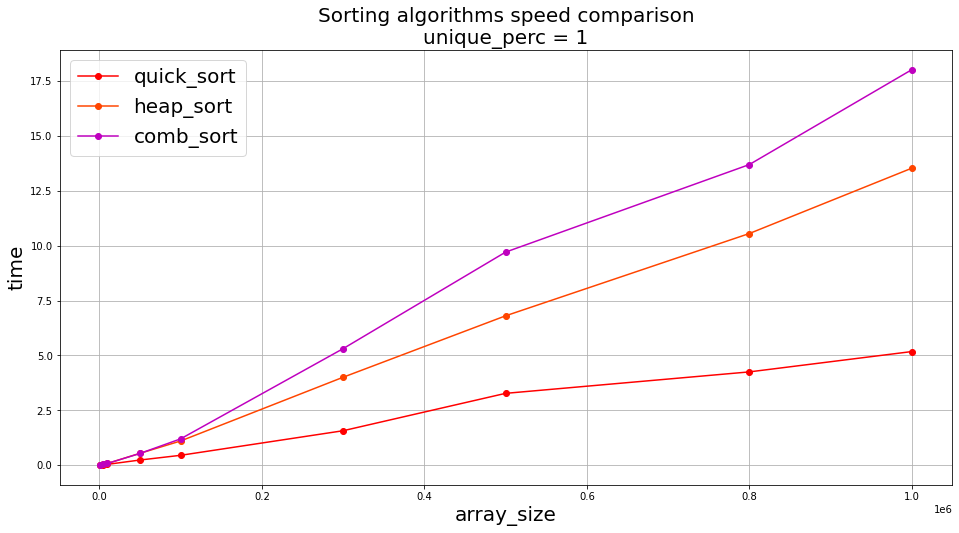

In [8]:
top_1 = get_top(results_1)
plot_top(top_1, unique_perc_1, 'top_1')

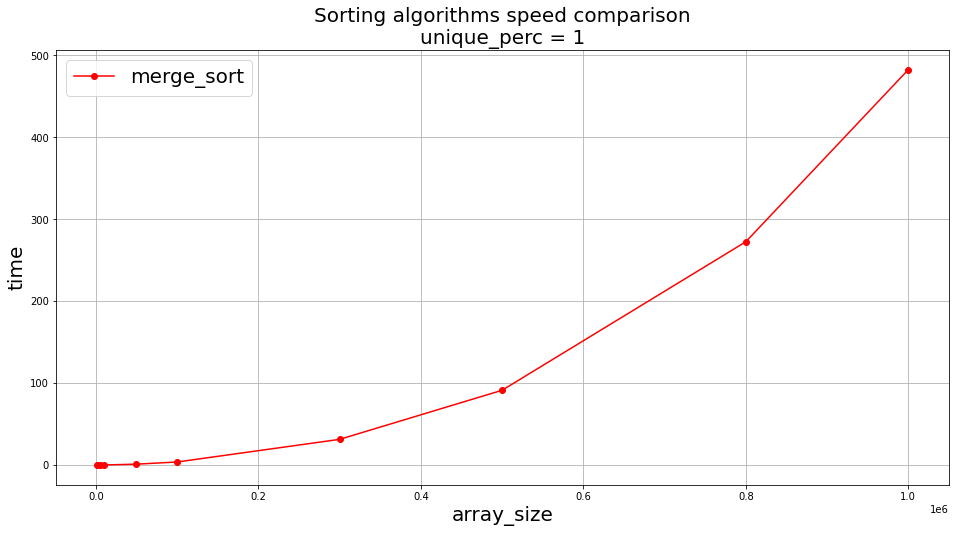

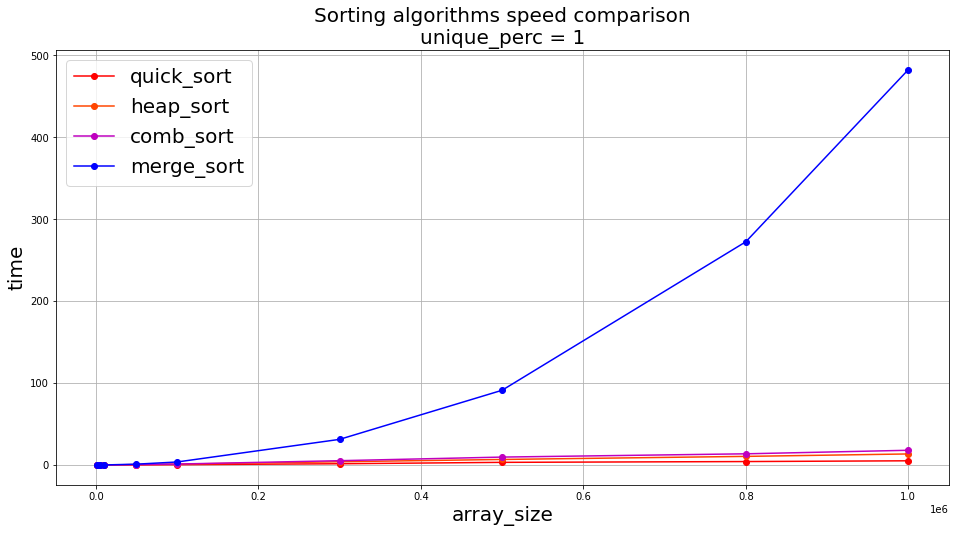

In [9]:
top_2 = get_top(results_2)
plot_top(top_2, unique_perc_1, 'top_2')
plot_top(top_1 + top_2, unique_perc_1, 'top_1_top_2')

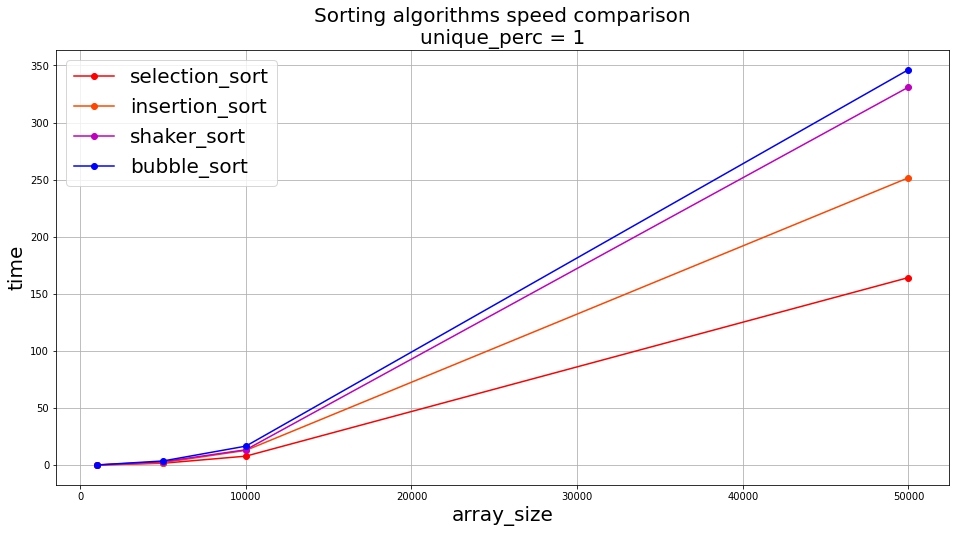

In [10]:
top_3 = get_top(results_3)
plot_top(top_3, unique_perc_1, 'top_3')

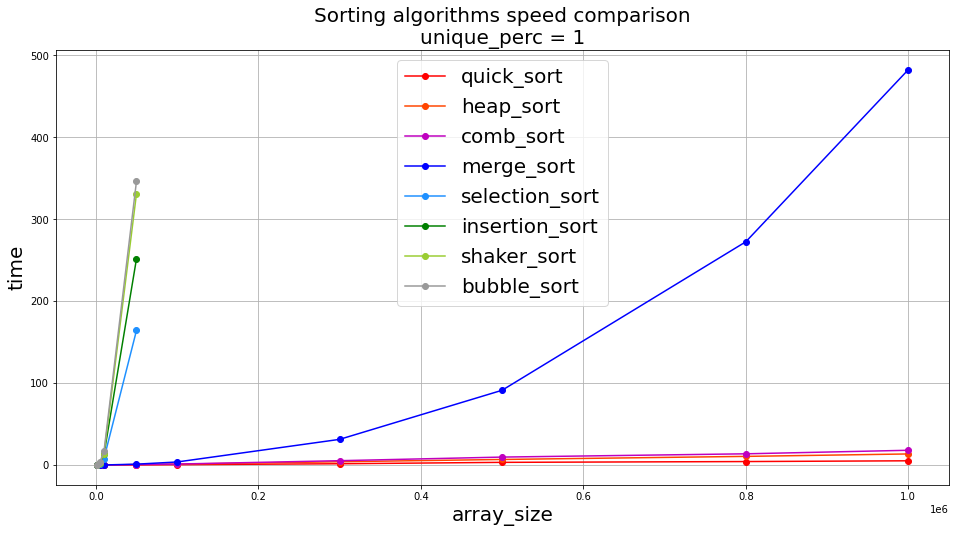

In [11]:
plot_top(top_1 + top_2 + top_3, unique_perc_1, 'top_1_top_2_top_3')

In [15]:
unique_perc_2 = 0.001
results_1_2 = test_speed(sort_funs[:3], array_sizes[:], unique_perc_2)

SPEED TEST
SORT FUNS: ['quick_sort', 'heap_sort', 'comb_sort']
UNIQUE PERCENTAGE: 0.001

ARRAY SIZE: 1000
UNIQUE COUNT: 1
SORT: quick_sort
TIME: 0.0029489994049072266
SORT: heap_sort
TIME: 0.0010318756103515625
SORT: comb_sort
TIME: 0.003126382827758789

TOP:
heap_sort: 0.0010318756103515625
quick_sort: 0.0029489994049072266
comb_sort: 0.003126382827758789

ARRAY SIZE: 5000
UNIQUE COUNT: 5
SORT: quick_sort
TIME: 0.026415586471557617
SORT: heap_sort
TIME: 0.029767990112304688
SORT: comb_sort
TIME: 0.02266669273376465

TOP:
comb_sort: 0.02266669273376465
quick_sort: 0.026415586471557617
heap_sort: 0.029767990112304688

ARRAY SIZE: 10000
UNIQUE COUNT: 10
SORT: quick_sort
TIME: 0.035024166107177734
SORT: heap_sort
TIME: 0.06689691543579102
SORT: comb_sort
TIME: 0.06063508987426758

TOP:
quick_sort: 0.035024166107177734
comb_sort: 0.06063508987426758
heap_sort: 0.06689691543579102

ARRAY SIZE: 50000
UNIQUE COUNT: 50
SORT: quick_sort
TIME: 0.21628475189208984
SORT: heap_sort
TIME: 0.48599624

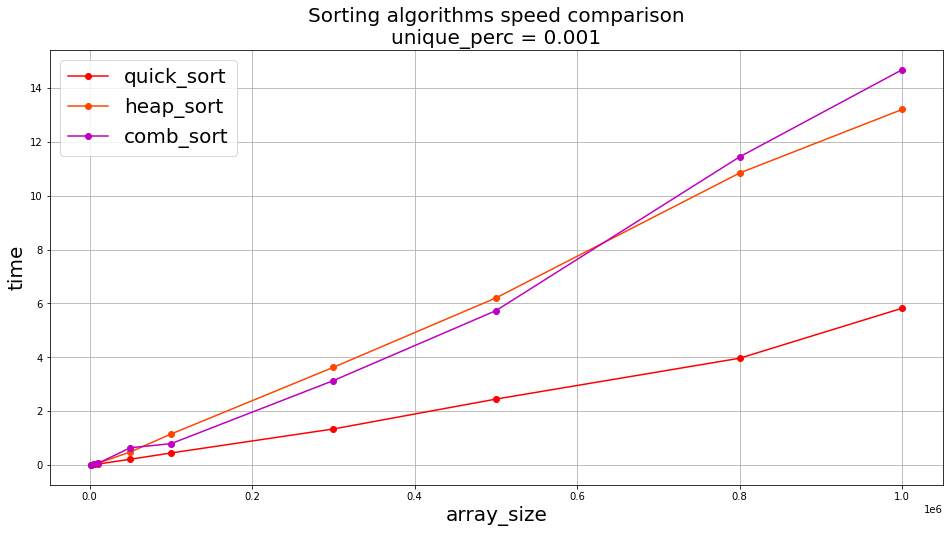

In [16]:
top_1_2 = get_top(results_1_2)
plot_top(top_1_2, unique_perc_2, 'top_1_2')

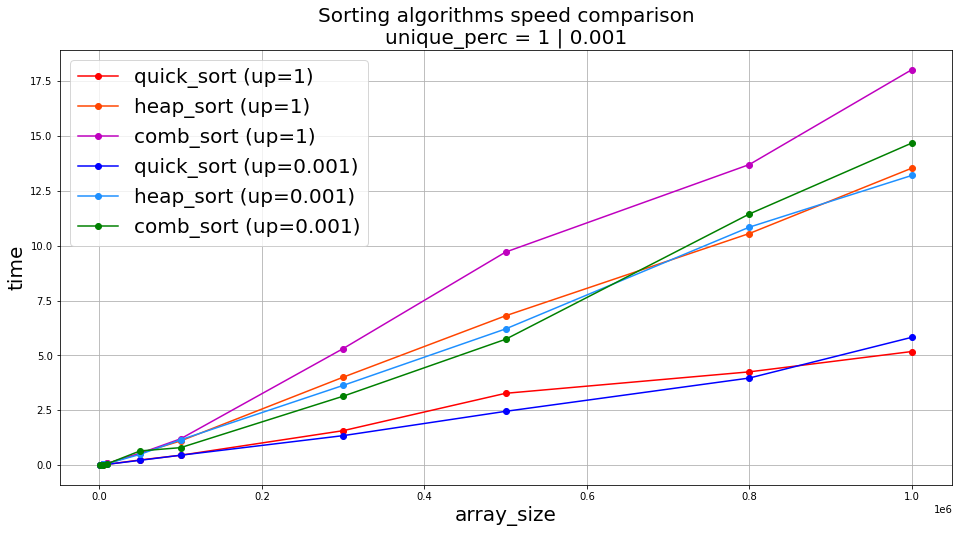

In [17]:
plot_top(list(map(lambda t: (t[0] + ' (up=%s)' % unique_perc_1, t[1]), top_1))
         + list(map(lambda t: (t[0] + ' (up=%s)' % unique_perc_2, t[1]), top_1_2)),
         '%s | %s' % (unique_perc_1, unique_perc_2),
         'up_comp')